# Notebook P1 CHARPENTIER Nicolas

# Rappel du projet

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise dans l'analyse des désastres maritimes. Un nouveau client, White Star Lines, se trouve face à un procès à travers le temps, affaire délicat. Votre chef vous demande, en tant que seul data scientist chez CoolCorp, d'analyser les données *.csv. WSL a déjà engagé un expert pour annoter une partie des données (test.csv) avec la survie ou pas des passagers.

# 1. Première visualisation des données


In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import math as mt
%matplotlib inline
import csv as csv

In [422]:
df = pd.read_csv('train.csv', header=0)
print df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# 2. Lien entre le prix des billets et l'age du passager + régression linaire


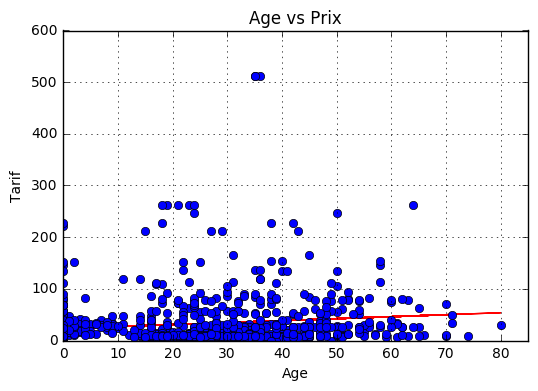

In [394]:

df.fillna(0, inplace=True)
Age  = df['Age']
Age = Age.astype(np.int64)
Tarif = df['Fare']
a, b, c, d, e = ss.linregress(Age,Tarif)
plt.figure();
plt.title('Age vs Prix')
plt.xlabel('Age')
plt.ylabel('Tarif')
plt.plot(Age, Tarif, 'k.')
line = a*Age+b
plt.plot(Age,line,'r-',Age,Tarif,'o')
plt.axis([0, 85, 0, 600])
plt.grid(True)
plt.show()



Nous voyons ici la présence de valeurs résiduelles grace à la regression linéaire, de plus, nous pouvons conclure que le prix du billet augmente légèrement lorsque l'âge augmente aussi.


# 3. Corrélation entre les personnes ayant survécu en fonction du prix de leur billet

In [409]:
#Etablissement de la moyenne du billet
df = pd.read_csv('train.csv', header=0)
dfTab = np.array(df)
dfTab = dfTab[1::]
fare = dfTab[0::,9].astype(np.float)
moyenneBillet = np.average(fare)
print('Prix moyen du billet : {p: .2f} €'.format(p=moyenneBillet))

listePascher = fare < moyenneBillet
listeCher = fare >= moyenneBillet

PasRiches = dfTab[listePascher,1].astype(np.float)     
Riches = dfTab[listeCher,1].astype(np.float)


ProportionPasRichesSurvivants = np.sum(PasRiches) / np.size(PasRiches)  
ProportionRichesSurvivants = np.sum(Riches) / np.size(Riches) 

print('Proportion de personnes pas riches qui survivent : {p:.2f}'.format(
        p=ProportionPasRichesSurvivants))
print('Proportion de riches qui survivent : {p:.2f}'.format(
        p=ProportionRichesSurvivants))


Prix moyen du billet :  32.23 €
Proportion de personnes pas riches qui survivent : 0.32
Proportion de riches qui survivent : 0.60


Nous voyons ici que plus les billets ont été payés chères, plus les passagers avaient de chances de survivre.

# 4. Corrélation entre les survivants femmes et hommes.

De part cette corrélation, nous en saurons d'avantages sur le pourcentage de femmes/hommes sauvés.

In [357]:
tt = pd.read_csv('train.csv', header=0)

sexF = tt["Sex"] == "female"
sexM = tt["Sex"] == "male"
survOK = tt["Survived"] == 1
survKO = tt["Survived"] == 0
nbF =  tt[sexF]
nbM = tt[sexM]
nbSurvOK = tt[survOK]

FOK = tt [ sexF & survOK ]
FKO = tt [ sexF & survKO ]
MOK = tt [ sexM & survOK ]
MKO = tt [ sexM & survKO ]
#print bb

nbFOK = len(FOK)
nbFKO = len(FKO)
nbMOK = len(MOK)
nbMKO = len(MKO)

proportionFOK = float(nbFOK) / float(len(nbF))
proportionFKO = float(nbFKO) / float(len(nbF))
proportionMOK = float(nbMOK) / float(len(nbM))
proportionMKO = float(nbMKO) / float(len(nbM))
proportionHommeOK = float(nbMOK) / float(len(nbSurvOK))
proportionFemmeOK = float(nbFOK) / float(len(nbSurvOK))

print('Proportion femmes vivantes : {p:.2f} '.format(p=proportionFOK))
print('Proportion femme mortes : {p:.2f} '.format(p=proportionFKO))
print('Proportion hommes vivants : {p:.2f} '.format(p=proportionMOK))
print('Proportion hommes morts : {p:.2f} '.format(p=proportionMKO))

Proportion femmes vivantes : 0.74 
Proportion femme mortes : 0.26 
Proportion hommes vivants : 0.19 
Proportion hommes morts : 0.81 


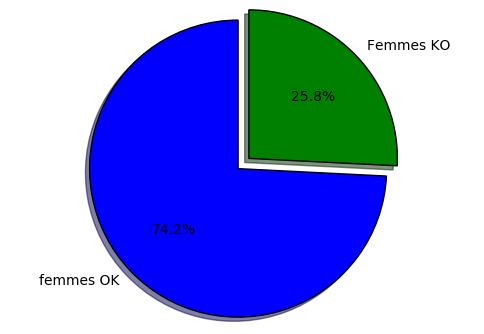

In [310]:
name = ['Hemmes OK', 'Femmes KO']
data = [proportionFOK, proportionFKO, ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

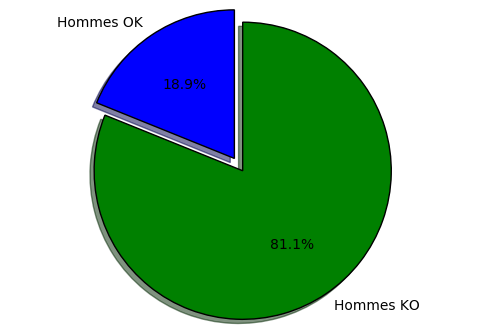

In [312]:
name = ['Hommes OK', 'Hommes KO']
data = [proportionMOK, proportionMKO ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

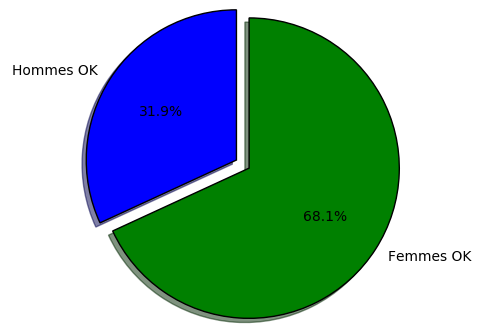

In [363]:
name = ['Hommes OK', 'Femmes OK']
data = [proportionHommeOK, proportionFemmeOK ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

"Les femmes et les enfants d'abord !" disaient-ils, pour ce qui est des enfants nous n'auront pas le fin mot de l'histoire, cependant, nous pouvons déduire à l'aide de ces graphiques, que les femmes ont très majoritairement été sauvées par rapport aux hommes.